<a href="https://colab.research.google.com/github/mvajhi/unsupervised-learning/blob/master/HW1/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install kneed

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from random import sample
import scipy.misc
import matplotlib.cm as cm
from scipy import linalg
import imageio
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

## Load data

In [8]:
datafile = 'https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv'
df = pd.read_csv(datafile)
X = df.to_numpy()
X

array([[ 10.846841 , -16.71258  ],
       [ 24.794334 , -16.775398 ],
       [  2.953309 ,  13.379048 ],
       ...,
       [-17.546083 , -10.295582 ],
       [ -8.512799 ,  16.37542  ],
       [-17.49305  ,  -2.6318119]])

In [60]:
# Visualizing the data, please don't change the code below!
def plotData(myX,myidxs = None):
    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """

    colors = ['b','g','gold','darkorange','salmon','olivedrab']


    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(np.unique(myidxs.flatten()).shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]

    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        print(newX.shape)
        plt.plot(newX[:,0],newX[:,1],'o',
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    leg = plt.legend(loc=4, framealpha=0.5)

(4406, 2)


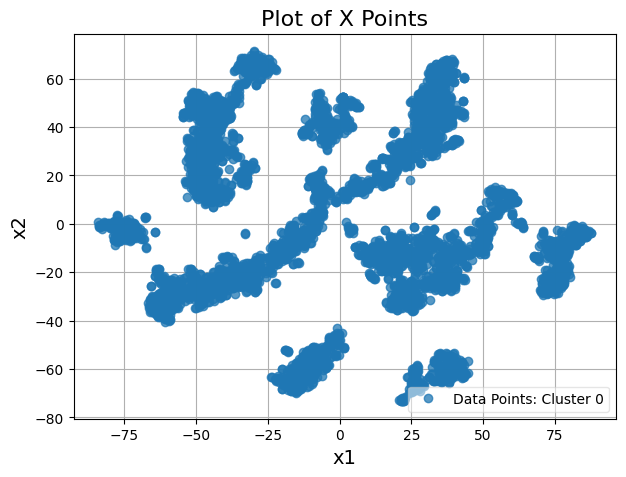

In [61]:
plotData(X)

## Find knee

In [62]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

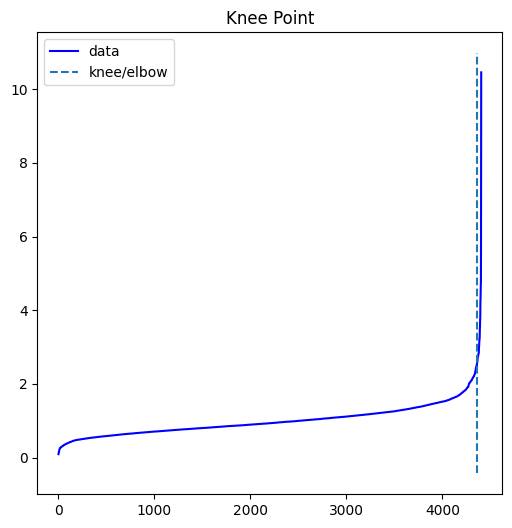

In [63]:
sorted_distances = np.sort(distances[:, 3])

kl = KneeLocator(
    x=np.arange(sorted_distances.shape[0]),
    y=sorted_distances,
    curve="convex"
    )
kl.plot_knee()
elbow = kl.elbow_y

## Train

In [80]:
clustering = DBSCAN(eps=elbow, min_samples=4).fit(X)

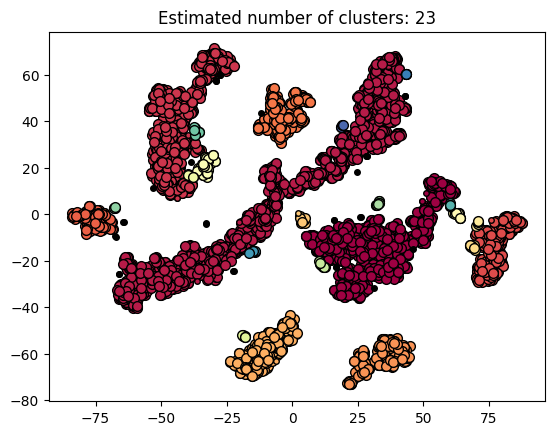

In [81]:
labels = clustering.labels_

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=7,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=4,
    )

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()